In [1]:
import csv  
import itertools

In [37]:
from datetime import datetime

In [5]:
import pandas as pd 

In [2]:
path = "D:\YT Data\yellow_tripdata_2015-01.csv";

In [79]:
df_chunk = pd.read_csv(path, chunksize=1000)

In [63]:
df_chunk

In [61]:
ex= pd.DataFrame(df_chunk.get_chunk(100))

In [62]:
ex

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
100,1,2015-01-26 12:41:09,2015-01-26 12:45:08,1,0.5,-73.982811,40.745255,1,N,-73.980042,40.752075,2,4.5,0.0,0.5,0.00,0.0,0.3,5.30
101,1,2015-01-26 12:41:09,2015-01-26 12:45:39,1,0.8,-73.991493,40.738937,1,N,-73.988594,40.730511,2,5.0,0.0,0.5,0.00,0.0,0.3,5.80
102,1,2015-01-26 12:41:10,2015-01-26 13:05:04,1,1.1,-73.982391,40.757408,1,N,-73.968620,40.761520,1,14.5,0.0,0.5,3.05,0.0,0.3,18.35
103,1,2015-01-26 12:41:10,2015-01-26 13:00:55,1,2.9,-73.973076,40.780361,1,N,-73.986259,40.746643,2,14.0,0.0,0.5,0.00,0.0,0.3,14.80
104,1,2015-01-26 12:41:11,2015-01-26 12:44:41,1,0.3,-73.971817,40.756901,1,N,-73.974548,40.751736,2,4.0,0.0,0.5,0.00,0.0,0.3,4.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,2015-01-20 22:49:14,2015-01-20 22:56:46,1,2.3,-73.948128,40.782906,1,N,-73.970390,40.757874,1,9.0,0.5,0.5,1.00,0.0,0.3,11.30
196,1,2015-01-20 22:49:14,2015-01-20 23:14:16,1,6.4,-73.982964,40.775791,1,N,-73.889488,40.740097,2,23.0,0.5,0.5,0.00,0.0,0.3,24.30
197,1,2015-01-20 22:49:14,2015-01-20 22:53:43,1,0.8,-73.997459,40.741722,1,N,-74.008682,40.738152,1,5.0,0.5,0.5,1.26,0.0,0.3,7.56
198,1,2015-01-20 22:49:14,2015-01-20 22:56:49,1,1.7,-73.961563,40.714287,1,N,-73.952301,40.694344,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80


In [21]:
ex.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [97]:
d1 = datetime.strptime("2015-01-26 12:41:09", '%Y-%m-%d %H:%M:%S')
d2 = datetime.strptime("2015-01-07 22:26:13", '%Y-%m-%d %H:%M:%S')
dif=divmod((d2-d1).total_seconds(),60)
dif

(-26775.0, 4.0)

In [45]:
d1.hour

12

In [28]:
type(date_time_obj)

datetime.datetime

In [ ]:
df = df.astype({"a": int, "b": complex})

In [71]:
import sqlite3
from sqlalchemy import create_engine

In [72]:
csv_database = create_engine('sqlite:///csv_database.db')

In [77]:
%%time
chunk_size=50000
for chunk in pd.read_csv(path,chunksize=chunk_size,iterator=True):
    chunk.to_sql('chunk_sql',csv_database, if_exists='append')

Wall time: 7min 53s


In [78]:
df_new = pd.read_sql_query('SELECT * FROM chunk_sql WHERE passenger_count <5 AND trip_distance > 10',csv_database)
df_new.head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,8,1,2015-01-10 20:33:39,2015-01-10 21:11:35,3,18.20,-73.783043,40.644356,2,N,-73.987595,40.759357,2,52.0,0.0,0.5,0.00,5.33,0.3,58.13
1,27,2,2015-01-15 19:05:42,2015-01-15 19:49:07,1,18.06,-73.786575,40.644127,2,N,-73.985603,40.743530,1,52.0,0.0,0.5,6.00,5.33,0.3,64.13
2,37,1,2015-01-10 19:12:21,2015-01-10 19:46:08,1,16.40,-73.977097,40.763172,2,N,-73.790710,40.644276,1,52.0,0.0,0.5,10.00,0.00,0.3,62.80
3,58,2,2015-01-25 00:13:09,2015-01-25 01:02:40,1,10.20,-73.997612,40.762241,1,N,-73.908577,40.690048,2,39.0,0.5,0.5,0.00,0.00,0.3,40.30
4,83,2,2015-01-15 14:00:43,2015-01-15 14:58:40,1,15.20,-73.801262,40.667728,2,N,-73.993355,40.756001,1,52.0,0.0,0.5,14.33,5.33,0.3,72.46


In [80]:
dff = pd.concat([chunk[chunk['passenger_count'] > 3] for chunk in df_chunk])

In [83]:
dff.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
16,2,2015-01-15 19:05:40,2015-01-15 19:21:00,5,2.83,-73.968704,40.754246,1,N,-73.955124,40.786858,2,12.5,1.0,0.5,0.00,0.00,0.3,14.30
17,2,2015-01-15 19:05:40,2015-01-15 19:28:18,5,8.33,-73.863060,40.769581,1,N,-73.952713,40.785782,1,26.0,1.0,0.5,8.08,5.33,0.3,41.21
24,2,2015-01-15 19:05:41,2015-01-15 19:22:11,5,2.11,-73.997459,40.736362,1,N,-73.978172,40.761856,1,11.5,1.0,0.5,2.50,0.00,0.3,15.80
25,2,2015-01-15 19:05:41,2015-01-15 19:14:05,5,1.15,-73.952278,40.823994,1,N,-73.953339,40.811089,1,7.5,1.0,0.5,1.70,0.00,0.3,11.00
29,2,2015-01-15 19:05:42,2015-01-15 19:21:40,6,5.19,-73.985291,40.744083,1,N,-74.009079,40.704689,1,17.5,1.0,0.5,3.70,0.00,0.3,23.00


Правильный вариант

In [1]:
import os 
import glob

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 500)
from tqdm.notebook import tqdm

In [2]:
import vaex

In [5]:
columns = ["VendorID","tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","pickup_longitude",
"pickup_latitude","RateCodeID","store_and_fwd_flag","dropoff_longitude","dropoff_latitude","payment_type","fare_amount","extra",
"mta_tax","tip_amount","tolls_amount","improvement_surcharge","total_amount"]

In [23]:
dtypes = {
'VendorID':np.int64,
'tpep_pickup_datetime':np.object,
'tpep_dropoff_datetime':np.object,
'passenger_count':np.int64,
'trip_distance':np.float64,
'pickup_longitude':np.float64,
'pickup_latitude':np.float64,
'RateCodeID':np.int64,
'store_and_fwd_flag':np.object,
'dropoff_longitude':np.float64,
'dropoff_latitude':np.float64,
'payment_type':np.int16,
'fare_amount':np.float64,
'extra':np.float64,
'mta_tax':np.float64,
'tip_amount':np.float64,
'tolls_amount':np.float64,
'improvement_surcharge':np.float64,
'total_amount':np.float64
};

In [38]:
output_dir = 'D:/'

In [42]:
files_list[0].split('/')[-1][:-3]+'hdf5'

'YT Data\\yellow_tripdata_2015-12.hdf5'

In [ ]:
files_list=np.sort(np.array(glob.glob('D:/YT Data/*.csv')))[::-1]

In [ ]:
for file in tqdm(files_list, leave=False, desc='Converting to hdf5...'):
    output_file = file.split('/')[-1][:-3]+'hdf5'
    output = output_dir + output_file
    
    # Check if a converted file already exists: if it does skip it, otherwise read in the raw csv and convert it
    if (os.path.exists(output) and os.path.isfile(output)):
        pass
    else:
        # Importing the data into pandas 
        pandas_df = pd.read_csv(file)
        # Importing the data from pandas to vaex
        vaex_df = vaex.from_pandas(pandas_df, copy_index=False)
        
        # Export the data with vaex to hdf5
        vaex_df.export_hdf5(path=output, progress=False)


In [3]:
df = vaex.open('D:/YT Data\\yellow_tripdata_2015-12.hdf5')

In [4]:
df

#,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,'2015-12-01 00:00:00','2015-12-01 00:05:16',5,0.96,-73.97994232177734,40.765380859375,1,'N',-73.96630859375,40.76308822631836,1,5.5,0.5,0.5,1.0,0.0,0.3,7.8
1,2,'2015-12-01 00:00:00','2015-12-01 00:00:00',2,2.69,-73.97233581542969,40.76237869262695,1,'N',-73.9936294555664,40.74599838256836,1,21.5,0.0,0.5,3.34,0.0,0.3,25.64
2,2,'2015-12-01 00:00:00','2015-12-01 00:00:00',1,2.62,-73.9688491821289,40.76453018188477,1,'N',-73.97454833984375,40.79164123535156,1,17.0,0.0,0.5,3.56,0.0,0.3,21.36
3,1,'2015-12-01 00:00:01','2015-12-01 00:05:56',1,1.2,-73.99393463134766,40.74168395996094,1,'N',-73.99766540527344,40.747467041015625,1,6.5,0.5,0.5,0.2,0.0,0.3,8.0
4,1,'2015-12-01 00:00:01','2015-12-01 00:09:28',2,3.0,-73.98892211914062,40.72698974609375,1,'N',-73.97559356689453,40.696868896484375,2,11.0,0.5,0.5,0.0,0.0,0.3,12.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,460,568",2,'2015-12-31 23:59:56','2016-01-01 00:08:18',5,1.2,-73.99381256103516,40.72087097167969,1,'N',-73.98621368408203,40.722469329833984,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
"11,460,569",1,'2015-12-31 23:59:58','2016-01-01 00:05:19',2,2.0,-73.96527099609375,40.76028060913085,1,'N',-73.93951416015625,40.75238800048828,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
"11,460,570",1,'2015-12-31 23:59:59','2016-01-01 00:12:55',2,3.8,-73.98729705810547,40.73907852172852,1,'N',-73.9886703491211,40.69329833984375,2,13.5,0.5,0.5,0.0,0.0,0.3,14.8
"11,460,571",2,'2015-12-31 23:59:59','2016-01-01 00:10:26',1,1.96,-73.99755859375,40.72569274902344,1,'N',-74.01712036132812,40.705322265625,2,8.5,0.5,0.5,0.0,0.0,0.3,9.8


In [5]:
df1=vaex.open('D:/YT Data\\yellow_tripdata_2015-11.hdf5')

In [6]:
df1

#,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,'2015-11-01 00:00:00','2015-11-01 00:26:00',1,2.9,-73.98399353027342,40.72949981689453,1,'N',-73.98455047607422,40.75917053222656,2,17.5,0.5,0.0,0.0,0.0,0.0,0.0
1,1,'2015-11-01 00:00:00','2015-11-01 00:08:24',1,0.8,-73.9840087890625,40.76528930664063,1,'N',-73.99043273925781,40.75932693481445,1,7.0,0.5,0.0,0.0,0.0,0.0,0.0
2,2,'2015-11-01 00:00:00','2015-11-01 00:12:17',1,0.74,-74.00261688232422,40.73405838012695,1,'N',-74.00436401367188,40.7406005859375,2,8.5,0.5,0.0,0.0,0.0,0.0,0.0
3,2,'2015-11-01 00:00:00','2015-11-01 00:25:08',1,2.89,-73.98731231689453,40.718711853027344,1,'N',-73.9915771484375,40.74911880493164,1,16.5,0.5,0.0,0.0,0.0,0.0,0.0
4,2,'2015-11-01 00:00:00','2015-11-01 00:19:44',1,5.07,-73.94992828369139,40.77219009399415,1,'N',-73.98812103271484,40.72291946411133,2,18.0,0.5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,312,671",1,'2015-11-30 21:04:15','2015-11-30 21:12:47',1,1.4,-73.9365005493164,40.75829315185547,1,'N',-73.9365005493164,40.75829315185547,1,8.0,0.0,0.0,0.0,0.0,0.0,0.0
"11,312,672",1,'2015-11-30 21:13:51','2015-11-30 21:19:56',1,1.4,-73.9365005493164,40.75829315185547,1,'N',-73.9365005493164,40.75829315185547,2,7.0,0.0,0.0,0.0,0.0,0.0,0.0
"11,312,673",1,'2015-11-30 21:44:28','2015-11-30 21:46:28',1,0.4,-73.9365005493164,40.75829315185547,1,'N',-73.9365005493164,40.75829315185547,2,3.5,0.0,0.0,0.0,0.0,0.0,0.0
"11,312,674",1,'2015-11-30 21:49:12','2015-11-30 22:03:25',1,3.0,-73.9365005493164,40.75829315185547,1,'N',-73.9365005493164,40.75829315185547,1,13.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_filtered=df[df.VendorID==1]

In [5]:
df.passenger_count

Expression = passenger_count
Length: 11,460,573 dtype: int64 (column)
----------------------------------------
       0  5
       1  2
       2  1
       3  1
       4  2
    ...    
11460568  5
11460569  2
11460570  2
11460571  1
11460572  1

In [7]:
import numpy as np
import pylab as plt
import seaborn as sns

In [8]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [9]:
passengers=df.passenger_count.value_counts()

In [10]:
passengers

1    8011559
2    1696099
5     615113
3     498487
6     379160
4     259581
0        525
7         22
9         14
8         13
dtype: int64

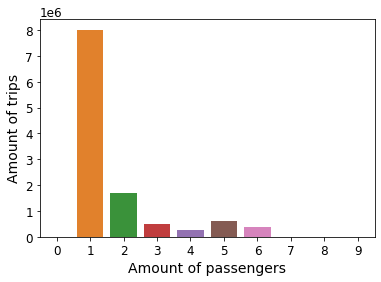

In [11]:
sns.barplot(x=passengers.index,y=passengers.values)
plt.xlabel('Amount of passengers')
plt.ylabel('Amount of trips')
plt.show()

In [12]:
df

#,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,'2015-12-01 00:00:00','2015-12-01 00:05:16',5,0.96,-73.97994232177734,40.765380859375,1,'N',-73.96630859375,40.76308822631836,1,5.5,0.5,0.5,1.0,0.0,0.3,7.8
1,2,'2015-12-01 00:00:00','2015-12-01 00:00:00',2,2.69,-73.97233581542969,40.76237869262695,1,'N',-73.9936294555664,40.74599838256836,1,21.5,0.0,0.5,3.34,0.0,0.3,25.64
2,2,'2015-12-01 00:00:00','2015-12-01 00:00:00',1,2.62,-73.9688491821289,40.76453018188477,1,'N',-73.97454833984375,40.79164123535156,1,17.0,0.0,0.5,3.56,0.0,0.3,21.36
3,1,'2015-12-01 00:00:01','2015-12-01 00:05:56',1,1.2,-73.99393463134766,40.74168395996094,1,'N',-73.99766540527344,40.747467041015625,1,6.5,0.5,0.5,0.2,0.0,0.3,8.0
4,1,'2015-12-01 00:00:01','2015-12-01 00:09:28',2,3.0,-73.98892211914062,40.72698974609375,1,'N',-73.97559356689453,40.696868896484375,2,11.0,0.5,0.5,0.0,0.0,0.3,12.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,460,568",2,'2015-12-31 23:59:56','2016-01-01 00:08:18',5,1.2,-73.99381256103516,40.72087097167969,1,'N',-73.98621368408203,40.722469329833984,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
"11,460,569",1,'2015-12-31 23:59:58','2016-01-01 00:05:19',2,2.0,-73.96527099609375,40.76028060913085,1,'N',-73.93951416015625,40.75238800048828,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
"11,460,570",1,'2015-12-31 23:59:59','2016-01-01 00:12:55',2,3.8,-73.98729705810547,40.73907852172852,1,'N',-73.9886703491211,40.69329833984375,2,13.5,0.5,0.5,0.0,0.0,0.3,14.8
"11,460,571",2,'2015-12-31 23:59:59','2016-01-01 00:10:26',1,1.96,-73.99755859375,40.72569274902344,1,'N',-74.01712036132812,40.705322265625,2,8.5,0.5,0.5,0.0,0.0,0.3,9.8


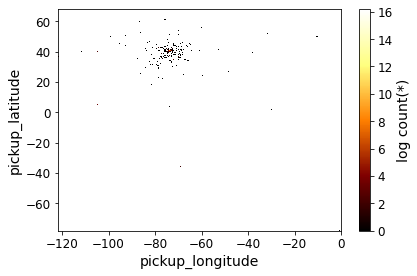

In [13]:
df.viz.heatmap(df.pickup_longitude, df.pickup_latitude, f='log')

In [27]:
df.total_amount.minmax()

array([-4.3330000e+02,  8.2603997e+05])

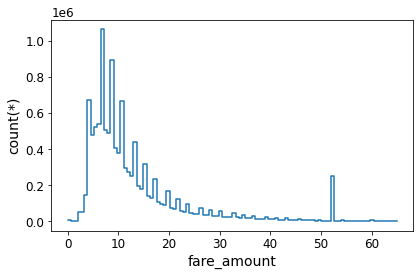

In [14]:
df.viz.histogram(df.fare_amount, shape=100, limits=[0, 65])

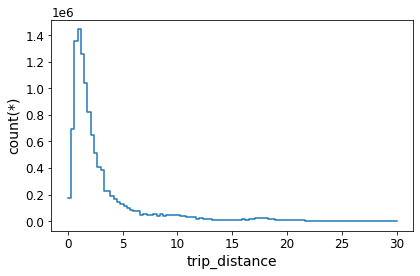

In [15]:
df.viz.histogram(df.trip_distance, shape=100, limits=[0, 30])

In [29]:
df['pickup_hour'] = df.tpep_pickup_datetime.astype('datetime64')

In [5]:
df

#,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,'2015-12-01 00:00:00','2015-12-01 00:05:16',5,0.96,-73.97994232177734,40.765380859375,1,'N',-73.96630859375,40.76308822631836,1,5.5,0.5,0.5,1.0,0.0,0.3,7.8
1,2,'2015-12-01 00:00:00','2015-12-01 00:00:00',2,2.69,-73.97233581542969,40.76237869262695,1,'N',-73.9936294555664,40.74599838256836,1,21.5,0.0,0.5,3.34,0.0,0.3,25.64
2,2,'2015-12-01 00:00:00','2015-12-01 00:00:00',1,2.62,-73.9688491821289,40.76453018188477,1,'N',-73.97454833984375,40.79164123535156,1,17.0,0.0,0.5,3.56,0.0,0.3,21.36
3,1,'2015-12-01 00:00:01','2015-12-01 00:05:56',1,1.2,-73.99393463134766,40.74168395996094,1,'N',-73.99766540527344,40.747467041015625,1,6.5,0.5,0.5,0.2,0.0,0.3,8.0
4,1,'2015-12-01 00:00:01','2015-12-01 00:09:28',2,3.0,-73.98892211914062,40.72698974609375,1,'N',-73.97559356689453,40.696868896484375,2,11.0,0.5,0.5,0.0,0.0,0.3,12.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,460,568",2,'2015-12-31 23:59:56','2016-01-01 00:08:18',5,1.2,-73.99381256103516,40.72087097167969,1,'N',-73.98621368408203,40.722469329833984,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
"11,460,569",1,'2015-12-31 23:59:58','2016-01-01 00:05:19',2,2.0,-73.96527099609375,40.76028060913085,1,'N',-73.93951416015625,40.75238800048828,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
"11,460,570",1,'2015-12-31 23:59:59','2016-01-01 00:12:55',2,3.8,-73.98729705810547,40.73907852172852,1,'N',-73.9886703491211,40.69329833984375,2,13.5,0.5,0.5,0.0,0.0,0.3,14.8
"11,460,571",2,'2015-12-31 23:59:59','2016-01-01 00:10:26',1,1.96,-73.99755859375,40.72569274902344,1,'N',-74.01712036132812,40.705322265625,2,8.5,0.5,0.5,0.0,0.0,0.3,9.8


In [6]:
from datetime import datetime

In [7]:
def convert_to_datetime(date_string):
    return np.datetime64(datetime.strptime(str(date_string), '%Y-%m-%d %H:%M:%S'))

In [42]:
df['pickup_hour']=df.tpep_pickup_datetime.apply(convert_to_datetime).dt.hour

In [9]:
df['duration']=(df.tpep_dropoff_datetime.apply(convert_to_datetime)-df.tpep_pickup_datetime.apply(convert_to_datetime))/np.timedelta64(1, 'm')

In [8]:
df.total_amount

Expression = total_amount
Length: 11,460,573 dtype: float64 (column)
------------------------------------------
       0    7.8
       1  25.64
       2  21.36
       3      8
       4   12.3
      ...      
11460568  10.56
11460569    8.8
11460570   14.8
11460571    9.8
11460572  17.76

In [10]:
df.duration

Expression = duration
Length: 11,460,573 dtype: float64 (column)
------------------------------------------
       0  5.26667
       1        0
       2        0
       3  5.91667
       4     9.45
       ...       
11460568  8.36667
11460569     5.35
11460570  12.9333
11460571    10.45
11460572  21.5167

In [19]:
(df.tpep_dropoff_datetime.apply(convert_to_datetime)-df.tpep_pickup_datetime.apply(convert_to_datetime))/np.timedelta64(1, 'm')

Expression = ((lambda_function(tpep_dropoff_datetime) - lambda_functio...
Length: 11,460,573 dtype: float64 (expression)
----------------------------------------------
       0  5.26667
       1        0
       2        0
       3  5.91667
       4     9.45
       ...       
11460568  8.36667
11460569     5.35
11460570  12.9333
11460571    10.45
11460572  21.5167

In [20]:
df.viz.heatmap((df.tpep_dropoff_datetime.apply(convert_to_datetime)-df.tpep_pickup_datetime.apply(convert_to_datetime))/np.timedelta64(1, 'm'), df.total_amount, limits='10%');

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [11]:
df_clear = df[df.duration<1]

In [12]:
df_clear

KeyboardInterrupt: 